# Лабораторная работа по нейроинформатике №5

Выполнил: _Коростелев Д.В._ Группа: _М8О-408Б-18_ Вариант: _11_


#### Используемые пакеты

In [1]:
#!pip install neurolab
#!pip uninstall numpy
#!pip install numpy
#!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl
import random
from neurolab.net import newelm
from numpy.matlib import repmat
from neupy.algorithms import DiscreteHopfieldNetwork

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


#### Условия

In [2]:
g = lambda k: np.cos(((-np.cos(k)) *k) + k)
interval = (2.9, 4.55)
R = [6,7,1]

### Задание 1

In [3]:
p1k = lambda k: np.sin(4 * np.pi * k)
p2k = g
k2 = interval

In [4]:
def gen_data(R):
    p1 = p1k(np.linspace(0, 1, int(1/0.025), endpoint=True))
    p2 = p2k(np.linspace(k2[0], k2[1], int((k2[1]-k2[0])/0.025), endpoint=True))
    t1 = np.ones((len(p1))) * (-1)
    t2 = np.ones((len(p2)))
    p2 = p2.reshape(1, p2.shape[0])
    t2 = t2.reshape(1, t2.shape[0])
    P = np.concatenate((np.matlib.repmat(p1, 1, R[0]), p2,
                        np.matlib.repmat(p1, 1, R[1]), p2,
                        np.matlib.repmat(p1, 1, R[2]), p2), axis=1).reshape(-1, 1)

    T = np.concatenate((np.matlib.repmat(t1, 1, R[0]), t2,
                        np.matlib.repmat(t1, 1, R[1]), t2,
                        np.matlib.repmat(t1, 1, R[2]), t2), axis=1).reshape(-1, 1)
    return P, T

Сгенерируем обучающее множество

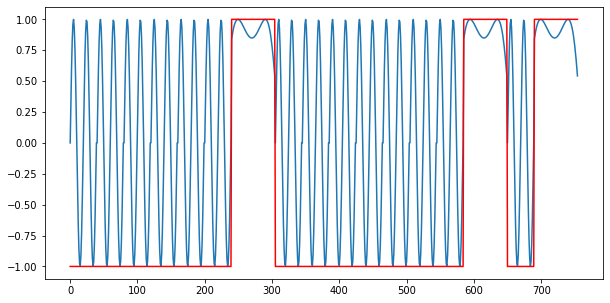

In [24]:
P, T = gen_data(R)
Ps = P.reshape(len(P))
Ts = T.reshape(len(T))
plt.figure(figsize=(10, 5))
plt.plot(Ps)
plt.plot(Ts, color="red")
plt.show()

Оъявим все функциональности и проверим сеть на этом множестве

In [27]:
def conf_layrecnet():
    net = newelm([[-10, 10]], [10, 1], [nl.trans.TanSig(),nl.trans.TanSig()])
    net.layers[0].np['w'][:] = 1 # set weight for all input neurons to 1
    net.layers[0].np['b'][:] = 0 # set bias for all input neurons to 0
    net.init()
    return net

def train_elman(net, X, Y, epochs):
    return net.train(X, Y, epochs=epochs, goal = 0.01, show=50)

def forward_elman(net, X):
    return net.sim(X)

def plot_simple_graph(values, label=None):
    plt.figure(figsize=(13, 7))
    plt.plot(values)
    if(label is not  None):
        plt.legend(label)
    plt.show()

def plot_multiple_graphs(values, labels, colors):
    plt.figure(figsize=(13, 7))
    for v,c  in zip(values, colors):
        plt.plot(v, color=c)
    plt.legend(labels)
    plt.show()
    
def plot_elman_results(error, predicted, targets):
    plot_simple_graph(error, ["Error"])
    plot_multiple_graphs([predicted, targets], ["Predicted", "Real Target"],['#FF0000', '#0000FF'])

def mse(a, b):
    return (np.square(a - b)).mean()

In [28]:
elman_net = conf_layrecnet()
error = train_elman(elman_net, P, T, epochs=250)

Epoch: 50; Error: 0.34320436521221;
Epoch: 100; Error: 0.07328549915691014;
Epoch: 150; Error: 0.11932244350110459;
Epoch: 200; Error: 0.09291749304337675;
Epoch: 250; Error: 0.0850933740130263;
The maximum number of train epochs is reached


In [29]:
predicted = forward_elman(elman_net, P)

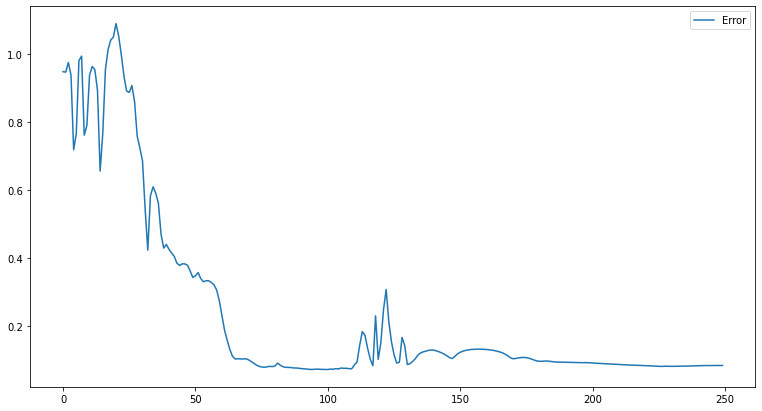

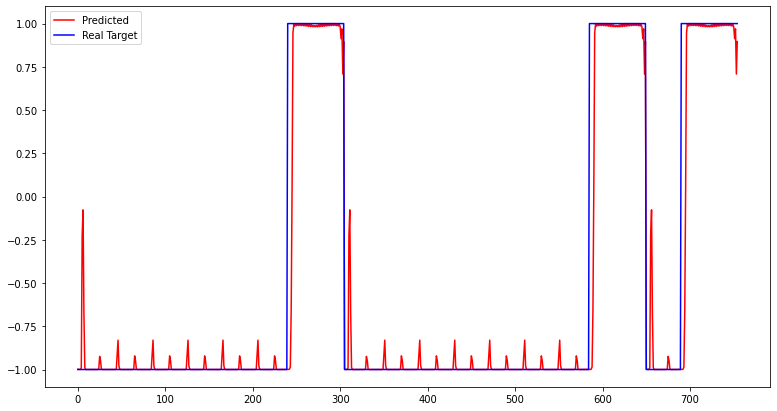

In [30]:
predicted_to_plot=predicted.reshape((len(predicted)))
plot_elman_results(error, predicted_to_plot, Ts)

Сформируем другое мнжество и проверим работу сети на ней

Epoch: 50; Error: 0.4676177489479202;
Epoch: 100; Error: 0.3871618336385097;
Epoch: 150; Error: 0.47746225888337873;
Epoch: 200; Error: 0.09591912406951601;
The goal of learning is reached
0.008600386752781736


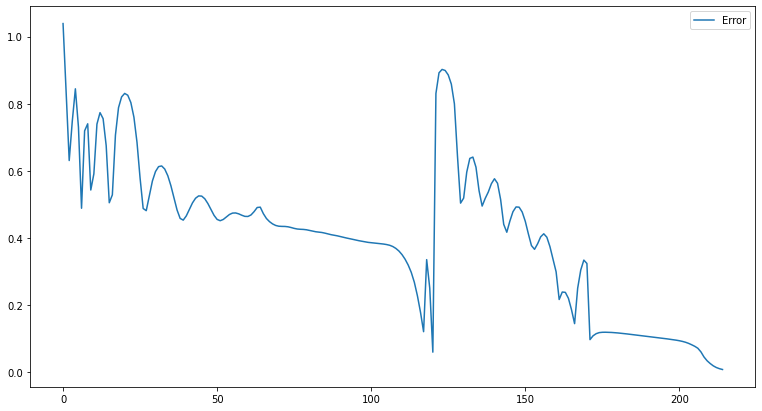

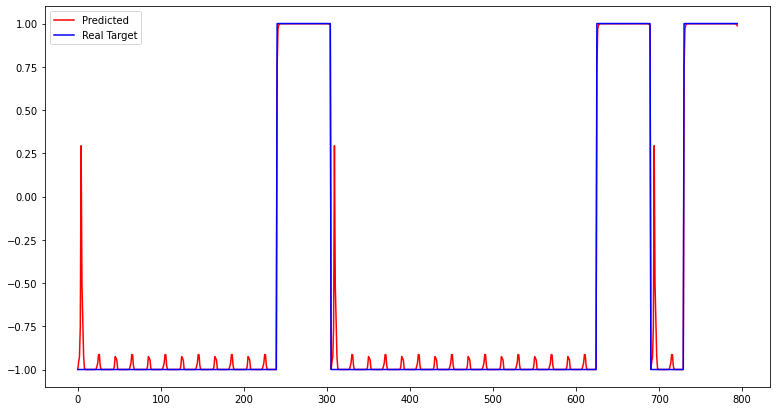

In [33]:
nR = R.copy()
nR[1] = 8

nP, nT = gen_data(nR)
other_elman_net = conf_layrecnet()
other_error = train_elman(other_elman_net, nP, nT, 250)
other_predicted = forward_elman(other_elman_net, nP)
print(mse(other_predicted, nT))

other_predicted_to_plot=other_predicted.reshape((len(other_predicted)))
plot_elman_results(other_error, other_predicted_to_plot, nT)

### Задание 2

In [11]:
nine = np.matrix([
    0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
    0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
    0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
    0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
    0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
    0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
    0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
    0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
    0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
    0, 0, 0, 0, 1, 1, 1, 1, 1, 1
])
six = np.matrix([
    1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
    1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
    1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
    1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
    1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
    1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 0, 0, 0, 0
])
one = np.matrix([
    0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
    0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
    0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
    0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
    0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
    0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
    0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
    0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
    0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
    0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
    0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
    0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

zero = np.matrix([
   0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
   0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
   0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
   0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
   0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
   0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
   0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
   0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
   0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
   0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
   0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
   0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


two = np.matrix([
    1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
    0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
    0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
    0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
    1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1, 0, 0])
    
three = np.matrix([
    0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
    0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
    0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
    0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
    0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
    0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
    0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
    0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
    0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
    0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
    0, 0, 1, 1, 1, 1, 1, 1, 0, 0])
numbers = np.concatenate([nine, six, one])
print(numbers.shape)

(3, 120)


In [12]:
def newhop(iterations):
    return DiscreteHopfieldNetwork(n_times = iterations)

def train_hop(model, X):
    model.train(X)
    
def predict_hop(model, X):
    return model.predict(X)

def draw_number(num):
    number = num.reshape(12, 10)
    for row in number.tolist():
        print(' '.join(' #'[val] for val in row))

In [13]:
hop = newhop(600)
train_hop(hop, numbers)
result = predict_hop(hop, nine)
draw_number(result)

        # # # # # #
        # # # # # #
        # #     # #
        # #     # #
        # #     # #
        # #     # #
        # # # # # #
        # # # # # #
                # #
                # #
        # # # # # #
        # # # # # #


In [14]:
def noise(number, percent):
    matrix_number = np.matrix(number.reshape(120))
    limit = matrix_number.shape[1]
    tmp = matrix_number.T
    
    for i in range((int(percent * 100))):
        pos = np.random.randint(1, limit, 1)[0]
        tmp[pos]  = 1 if tmp[pos] == 0 else 0
    res = tmp.T
    return res

In [15]:
noise_six = noise(six, 0.2)
draw_number(noise_six)

# # # #   #        
# # #   # #     #  
#       #     #    
# #     #   #      
#   # #   #     #  
# # #   # #        
#       # # #      
# #     # # # #    
# #     # #        
# #     # #        
  # #   #          
# # # # # #       #


In [16]:
noise_six_result = predict_hop(hop, noise_six)
draw_number(noise_six_result.reshape(12, 10))

# # # # # #        
# # # # # #        
# #                
# #                
# # # # # #        
# # # # # #        
# #     # #        
# #     # #        
# #     # #        
# #     # #        
# # # # # #        
# # # # # #        


In [17]:
noise_one = noise(one, 0.3)
draw_number(noise_one)
print()
noise_one_result = predict_hop(hop, noise_one)
draw_number(noise_one_result)

      # # # #      
      #   # #      
      # # # #      
    # # # # #   # #
      #   #        
  #   # #          
      # # #   #    
      #   # #      
      # # # #      
      # #   #      
  #   # #   #   #  
# #   # #   #     #

      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      


### Задание 3

In [18]:
zero = np.array([
               -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
               -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
               -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
               -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
               -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
       
one = np.array([
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1])
       
two = np.array([
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1])
    
three = np.array([
                -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, -1, -1])
       
four = np.array([
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, 1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1])

six = np.array([
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1,
                1, -1, -1, -1, -1, -1, -1, -1, -1, 1,
                1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1])
       
nine = np.array([
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, -1, -1, -1, -1, 1, 1,
                -1, -1, -1, -1, -1, -1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1])

patterns = np.array([zero, one, two, three, four, six, nine])


In [19]:
class modifed_hop:
    def __init__(self, iterations, patterns):
        size = len(patterns)
        nums = [0, 1, 2, 3, 4, 6, 9]
        eps = 1 / (size - 3)

        # input shape
        shape = 10 * 12

        IW = np.array([zero.T, one.T, two.T, three.T, four.T, six.T, nine.T])
        B = shape * np.ones((size, 1))

        a = np.zeros((size, size))
        for i in range(size):
            a[i] = IW[i] @ patterns[i] + B[i]

        LW = np.eye(size)
        LW[LW == 0.0] = -eps
        network = nl.net.newhop(a, max_init=iterations)

        network.layers[0].np['w'][:] = LW
        network.layers[0].np['b'][:] = 0
        self.IW = IW
        self.B = B
        self.HOP = network
        self.answer = [0, 1, 2, 3, 4, 6, 9]

    def predict(self, number):
        tmpCalc = self.IW @ number + self.B
        return self.answer[np.argmax(self.HOP.sim(tmpCalc)[0])]

In [20]:
modf_hop = modifed_hop(600, patterns)
modf_hop.predict(six)

6

In [21]:
def noise_for_hop(number, percent):
    copy = number.copy()
    for el in copy:
        num = random.randint(1, 100)
        if num <= int(percent*100):
            el = 1 if el == -1 else -1
    return copy

In [22]:
hop_noise_zero = noise_for_hop(zero, 0.2)
hop_noise_nine = noise_for_hop(nine, 0.3)
hop_noise_zero.shape

(120,)

In [23]:
print(f"Predicted: {modf_hop.predict(hop_noise_zero)}")
print(f"Predicted: {modf_hop.predict(hop_noise_nine)}")

Predicted: 0
Predicted: 9


### Вывод

В данной лабораторной работе основным проблемным местом стала нейронная сеть Элмана. Так сеть элмана – рекуррентная, алгоритм ее обучения не простой и при реализации с нуля может выходить за рамки обычной лабораторной работы. Использовал готовую нейронную сеть из бибилотеки neurolab, однако сначала нейронная сеть выдавала некорректные результаты. Чтобы исправить это, пришлось много экспериментировать с различными гиперпараметрами нейронной сети. В итоге удалось найти наиболее удачную конфигурацию (в ходе тестирования данной реализации удалось установить, что нейронная сеть плохо определяет класс функции на текущей временной точке, если эти две функции сильно похожи. В таком случае требуется либо увеличивать число эпох, что чаще всего не приведет к правильному решению, либо проводить анализ функций и в соответствии с ним выбирать обучающее множество).